<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-1-Build/blob/master/Build_Week_Unit_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading in datasets

In [0]:
!pip install category_encoders
import joblib
import sklearn
import category_encoders as ce
import xgboost
import plotly.express as px
from joblib import dump
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'xgboost=={xgboost.__version__}')

     |████████████████████████████████| 102kB 3.5MB/s 
joblib==0.14.1
scikit-learn==0.22.1
category_encoders==2.1.0
xgboost==0.90


In [0]:
import pandas as pd
# Remember to upload data to unit 2 build
!git clone https://github.com/skredenmathias/DS-Unit-1-Build.git
path = '/content/DS-Unit-1-Build/'

fatal: destination path 'DS-Unit-1-Build' already exists and is not an empty directory.


In [0]:

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [0]:
year_2016 = pd.read_excel(path+'2016 complete match data OraclesElixir 2018-12-18.xlsx')
year_2016.shape

(19824, 84)

In [0]:
year_2017 = pd.read_excel(path+'2017matchdataOraclesElixir.xlsx')
year_2017.shape

(37404, 98)

In [0]:
spring_2018 = pd.read_excel(path+'2018-spring-match-data-OraclesElixir-2018-05-20.xlsx')
spring_2018.shape

(15900, 98)

In [0]:
summer_2018 = pd.read_excel(path+'2018 summer match data OraclesElixir 2018-09-27.xlsx')
summer_2018.shape

(16188, 98)

In [0]:
worlds_2018 = pd.read_excel(path+'2018-worlds-match-data-OraclesElixir-2018-11-03.xlsx')
worlds_2018.shape

(1428, 98)

In [0]:
spring_2019 = pd.read_excel(path+'2019-spring-match-data-OraclesElixir-2019-05-21.xlsx')
spring_2019.shape

(12864, 98)

In [0]:
summer_2019 = pd.read_excel(path+'2019-summer-match-data-OraclesElixir-2019-09-16.xlsx')
summer_2019.shape

(12612, 98)

In [0]:
worlds_2019 = pd.read_excel(path+'2019-summer-match-data-OraclesElixir-2019-11-10.xlsx')
worlds_2019.shape

(1428, 98)

# Merging dataframes

In [0]:
# Merging dataframes 1/2
dfs = [year_2017, spring_2018, summer_2018, worlds_2018, spring_2019, summer_2019, worlds_2019]
# Not including year_2016 due to several missing columns

# Concatenating
test = pd.concat(dfs)
test.shape

(97824, 98)

# Data Cleaning

In [0]:
def wrangle(X):
  X = X.copy()

  excess_columns = ['url','date','week', 'playerid','position','player',
                    'champion','ban1','ban2','ban3','ban4','ban5','k','d','a',
                    'doubles','triples','quadras','pentas','fb','fbassist',
                    'fbvictim', 'kpm','okpm', 'fd','heraldtime','dmgtochamps',
                    'dmgshare','earnedgoldshare','wards','wardshare',
                    'wardkills','visionwards','visionwardbuys',
                    'visiblewardclearrate','invisiblewardclearrate','totalgold',
                    'minionkills',
                       'monsterkills', 'monsterkillsownjungle',
                    'monsterkillsenemyjungle','goldat10','oppgoldat10',
                    'goldat15','oppgoldat15','xpat10','oppxpat10','csat10',
                    'oppcsat10','csat15','oppcsat15']
  X = X.drop(columns = excess_columns)
  return X

df = wrangle(test)
df.shape

(97824, 47)

In [0]:
# Removing excess drake columns, and HERALD

def wrangle2(X):
  X = X.copy()

  difficult_columns = ['elementals','oppelementals','firedrakes','waterdrakes',
                       'earthdrakes','airdrakes', 'herald']
  X = X.drop(columns = difficult_columns)
  return X

df = wrangle2(df)
df.shape

(97824, 40)

In [0]:
# Remove LPL games from dataframe, due to excess NaN values
LPL1 = df['league'] == 'LPL'
LPL = df[LPL1]

df = pd.concat([df, LPL]).drop_duplicates(keep=False)
df.shape

(75396, 40)

In [0]:
# Remove rows with NaN values
df = df.copy()
df = df.dropna()
df.shape

(72238, 40)

# Data Exploration

In [0]:
df.head(10)

,gameid,league,split,game,patchno,side,team,gamelength,result,teamkills,teamdeaths,fbtime,ckpm,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,343.729481,0.551543,0.078792,224.749048,9025.0,0.028090,9.258043,114.0,123.0,-8.0,5.0,14.0
1,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,169.402495,0.590939,0.118188,164.827840,6650.0,-0.241322,4.451740,53.0,-756.0,-27.0,0.0,-17.0
2,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,263.873933,0.630335,0.157584,241.177150,8700.0,-0.171789,9.809586,-22.0,-1050.0,-81.0,1.0,-1.0
3,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,408.417597,0.393959,0.039396,184.919764,8275.0,-0.191257,7.367039,-354.0,-1057.0,157.0,-7.0,-16.0
4,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,89.389363,0.827315,0.315167,120.822587,6880.0,-0.092862,0.472751,-133.0,-1114.0,-223.0,3.0,5.0
5,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,313.079448,0.551543,0.236376,298.577019,8775.0,-0.028090,9.218647,-114.0,-123.0,8.0,-5.0,-14.0
6,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,374.773473,0.630335,0.393959,256.462771,8475.0,0.241322,4.766907,-53.0,756.0,27.0,0.0,17.0
7,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,818.411031,0.275772,0.078792,356.489035,10335.0,0.171789,8.588313,22.0,1050.0,81.0,-1.0,1.0
8,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,539.290873,0.433355,0.118188,342.227708,10025.0,0.191257,9.179251,354.0,1057.0,-157.0,7.0,16.0
9,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,101.405121,1.339462,0.236376,242.162049,7550.0,0.092862,0.315167,133.0,1114.0,223.0,-3.0,-5.0


In [0]:
df['split'].value_counts()

2017-2      12048
2017-1      11760
2018-1      10296
2018-2       9142
2019-1       7752
2019-2       6552
2017-2po     1464
2018-2p      1452
2018-1P      1440
2019-W       1380
2017-W       1380
2017-1po     1344
2018-W       1344
2019-2P      1008
2017-2pr      900
2019-1P       864
2017-2rq      564
2018-2rq      540
2019-2RQ      528
2017-1pr      480
Name: split, dtype: int64

# Reducing dimensionality

## Grouping by 'gameid'

In [0]:
x = df.groupby(['gameid','team'])['result'].mean()
x = x.reset_index()
x.columns = ['gameid','team','result']
print(x.shape)
x.head(10) 
# .. teamA, team B, 1/0 -> A/B win. (0 and 1 represent A and B)
# A/B should be fine with models
# .. iterate 2 rows at a time 
# merge after merge y

(12038, 3)


,gameid,team,result
0,136,Tempo Storm,1
1,136,eUnited,0
2,143,Delta Fox,1
3,143,Team Gates,0
4,144,Tempo Storm,0
5,144,eUnited,1
6,149,Big Gods Jackals,1
7,149,Gold Coin United,0
8,150,Delta Fox,1
9,150,Team Gates,0


## Finding the all time average stats per team

In [0]:
y = df.groupby(['team'])['league', 'game', 'patchno', 'side',
       'gamelength', 'result', 'teamkills', 'teamdeaths', 'fbtime', 'ckpm',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15'].mean()
       
y = y.reset_index()
y.columns = ['team','patchno',
       'gamelength', 'result', 'teamkills', 'teamdeaths',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']
print(y.shape)
y.head()

(166, 32)


,team,patchno,gamelength,result,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,100 Thieves,8.466061,36.394276,0.484848,10.242424,10.323232,10.411318,1.858586,2.323232,0.057239,0.067340,0.545455,13.742046,0.434343,6.151515,6.444444,0.444444,26.781731,0.787879,0.848485,580.334028,1.122773,0.519087,364.389580,19713.090909,-0.012831,11.039376,-42.212121,-115.245791,20.239057,-2.562290,-4.841751
1,100 Thieves Academy,8.087317,33.209756,0.463415,10.243902,11.219512,11.266693,1.609756,1.731707,0.024390,0.016260,0.414634,11.899007,0.390244,5.829268,6.317073,0.439024,26.088115,0.585366,0.707317,586.893949,1.184080,0.442289,365.683060,17928.024390,-0.013544,11.354436,-6.975610,-184.487805,-38.487805,-1.536585,-2.902439
2,17 Academy,7.170000,36.974074,0.333333,9.777778,13.333333,17.240446,1.000000,1.888889,0.037037,0.074074,0.333333,14.233174,0.444444,4.888889,7.444444,0.444444,25.370593,0.777778,1.000000,556.900503,1.292819,0.503088,369.089153,20150.259259,-0.021903,10.766707,39.481481,-327.222222,-6.444444,0.629630,-0.333333
3,AHQ Fighter,7.170000,30.850000,0.600000,9.300000,9.300000,17.370332,1.300000,1.100000,0.000000,0.000000,0.600000,15.022647,0.500000,6.100000,5.300000,0.600000,24.357650,0.800000,0.500000,556.228714,1.210518,0.462923,373.537038,16308.966667,-0.005458,10.704992,-200.766667,26.200000,-147.633333,-0.700000,-0.966667
4,AHQ e-Sports Club,8.100568,35.462445,0.519651,11.257642,10.855895,11.844584,2.030568,1.877729,0.045124,0.046579,0.532751,14.379828,0.593886,6.183406,5.755459,0.532751,26.902978,0.772926,0.751092,597.573222,1.240369,0.559982,381.063457,19504.919942,0.012274,11.107435,14.796215,30.882096,8.503639,0.491994,1.224163


## Merging with 'gameid'. 2 rows per game, stats are average for all-time

In [0]:
# Merge x + y on 'team'
df4 = pd.merge(x, y, on='team')
print(df4.shape)
df4.head() # If we keep split we can make it a little more interesting.
# Use this as a baseline after removing a column or three.

(12038, 34)


,gameid,team,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,1,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
1,144,Tempo Storm,0,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
2,20064,Tempo Storm,1,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
3,20068,Tempo Storm,1,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
4,20362,Tempo Storm,0,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524


In [0]:
df6 = df4.sort_values('gameid')
df6.head()

,gameid,team,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,1,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.523810,12.565649,0.523810,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
42,136,eUnited,0,7.093333,34.770899,0.603175,14.015873,12.428571,13.687389,1.603175,1.539683,0.026455,0.037037,0.460317,13.065528,0.555556,6.920635,5.174603,0.555556,26.850763,0.809524,0.539683,706.027079,1.088394,0.409494,395.055800,19258.973545,0.025116,10.478285,26.597884,87.947090,10.068783,0.317460,0.910053
105,143,Delta Fox,1,7.088710,34.272581,0.193548,11.193548,18.000000,12.393216,1.064516,2.451613,0.053763,0.064516,0.322581,11.199691,0.322581,3.806452,8.677419,0.161290,26.459786,0.419355,1.064516,597.393878,0.964238,0.313753,340.140381,18404.086022,-0.088033,9.774593,-283.827957,-673.225806,-204.559140,-5.978495,-9.462366
136,143,Team Gates,0,7.024000,35.450000,0.000000,7.200000,15.600000,9.995058,0.900000,3.300000,0.033333,0.133333,0.100000,11.034217,0.000000,1.300000,10.000000,0.200000,26.871108,0.300000,1.400000,464.373127,1.017214,0.349491,298.945990,17431.566667,-0.200612,9.935096,-430.000000,-1003.800000,-287.066667,-8.866667,-16.933333
1,144,Tempo Storm,0,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.523810,12.565649,0.523810,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524


## Merging our two rows per game into one

In [0]:
# new_df = []
new_df = pd.DataFrame(pd.concat([df6.iloc[0], df6.iloc[1]])).T
for i in range(2, len(df6), 2):
  row = pd.DataFrame(pd.concat([df6.iloc[i], df6.iloc[i+1]])).T
  new_df = pd.concat([new_df, row])

In [0]:
# pd.DataFrame(new_df).T
new_df.head()

,gameid,team,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15,gameid,team,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,1,7.09071,35.9345,0.571429,10.8095,11.3571,12.7319,1.90476,1.80952,0.0793651,0.047619,0.52381,12.5656,0.52381,6.7381,6.14286,0.595238,27.7239,0.809524,0.761905,635.381,1.13571,0.364791,381.888,19544.5,0.0192324,10.4996,51.0635,118.278,-39.9365,-0.174603,0.809524,136,eUnited,0,7.09333,34.7709,0.603175,14.0159,12.4286,13.6874,1.60317,1.53968,0.026455,0.037037,0.460317,13.0655,0.555556,6.92063,5.1746,0.555556,26.8508,0.809524,0.539683,706.027,1.08839,0.409494,395.056,19259,0.025116,10.4783,26.5979,87.9471,10.0688,0.31746,0.910053
0,143,Delta Fox,1,7.08871,34.2726,0.193548,11.1935,18,12.3932,1.06452,2.45161,0.0537634,0.0645161,0.322581,11.1997,0.322581,3.80645,8.67742,0.16129,26.4598,0.419355,1.06452,597.394,0.964238,0.313753,340.14,18404.1,-0.0880334,9.77459,-283.828,-673.226,-204.559,-5.97849,-9.46237,143,Team Gates,0,7.024,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333
0,144,Tempo Storm,0,7.09071,35.9345,0.571429,10.8095,11.3571,12.7319,1.90476,1.80952,0.0793651,0.047619,0.52381,12.5656,0.52381,6.7381,6.14286,0.595238,27.7239,0.809524,0.761905,635.381,1.13571,0.364791,381.888,19544.5,0.0192324,10.4996,51.0635,118.278,-39.9365,-0.174603,0.809524,144,eUnited,1,7.09333,34.7709,0.603175,14.0159,12.4286,13.6874,1.60317,1.53968,0.026455,0.037037,0.460317,13.0655,0.555556,6.92063,5.1746,0.555556,26.8508,0.809524,0.539683,706.027,1.08839,0.409494,395.056,19259,0.025116,10.4783,26.5979,87.9471,10.0688,0.31746,0.910053
0,149,Gold Coin United,0,7.08973,37.5854,0.616438,12.5068,9.63014,13.0466,2.09589,1.67123,0.0684932,0.0639269,0.643836,13.0935,0.643836,7.32877,5.38356,0.643836,28.822,0.986301,0.575342,662.863,1.0909,0.442733,390.925,20659.1,0.0302383,10.5156,114.53,228.511,100.16,4.07763,5.30137,149,Big Gods Jackals,1,7.08765,35.3951,0.352941,11.2647,14.5588,12.1321,1.79412,1.76471,0.0588235,0.0490196,0.558824,11.4632,0.323529,5.05882,7.38235,0.352941,26.9631,0.529412,0.882353,671.514,1.12087,0.360211,347.862,18666.6,-0.0587239,9.96767,-66.951,-186.833,-47.098,-2.34314,-3.78431
0,150,Delta Fox,1,7.08871,34.2726,0.193548,11.1935,18,12.3932,1.06452,2.45161,0.0537634,0.0645161,0.322581,11.1997,0.322581,3.80645,8.67742,0.16129,26.4598,0.419355,1.06452,597.394,0.964238,0.313753,340.14,18404.1,-0.0880334,9.77459,-283.828,-673.226,-204.559,-5.97849,-9.46237,150,Team Gates,0,7.024,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333


In [0]:
new_df.shape

(6019, 68)

In [0]:
new_df.columns = ['gameid_a', 'team_a', 'result_a', 'patchno_a', 'gamelength_a', 'result_y_a',
       'teamkills_a', 'teamdeaths_a', 'fdtime_a', 'teamdragkills_a', 'oppdragkills_a',
       'elders_a', 'oppelders_a', 'ft_a', 'fttime_a', 'firstmidouter_a',
       'teamtowerkills_a', 'opptowerkills_a', 'fbaron_a', 'fbarontime_a',
       'teambaronkills_a', 'oppbaronkills_a', 'dmgtochampsperminute_a', 'wpm_a',
       'wcpm_a', 'earnedgpm_a', 'goldspent_a', 'gspd_a', 'cspm_a', 'gdat10_a', 'gdat15_a',
       'xpdat10_a', 'csdat10_a', 'csdat15_a', 'gameid_b', 'team_b', 'result_b',
       'patchno_b', 'gamelength_b', 'result_y_b', 'teamkills_b', 'teamdeaths_b',
       'fdtime_b', 'teamdragkills_b', 'oppdragkills_b', 'elders_b', 'oppelders_b', 'ft_b',
       'fttime_b', 'firstmidouter_b', 'teamtowerkills_b', 'opptowerkills_b', 'fbaron_b',
       'fbarontime_b', 'teambaronkills_b', 'oppbaronkills_b', 'dmgtochampsperminute_b',
       'wpm_b', 'wcpm_b', 'earnedgpm_b', 'goldspent_b', 'gspd_b', 'cspm_b', 'gdat10_b',
       'gdat15_b', 'xpdat10_b', 'csdat10_b', 'csdat15_b']

In [0]:
new_df['winner'] = new_df['result_a'].apply(lambda x: "A" if x == 1 else "B")

In [0]:
new_df.head()

,gameid_a,team_a,result_a,patchno_a,gamelength_a,result_y_a,teamkills_a,teamdeaths_a,fdtime_a,teamdragkills_a,oppdragkills_a,elders_a,oppelders_a,ft_a,fttime_a,firstmidouter_a,teamtowerkills_a,opptowerkills_a,fbaron_a,fbarontime_a,teambaronkills_a,oppbaronkills_a,dmgtochampsperminute_a,wpm_a,wcpm_a,earnedgpm_a,goldspent_a,gspd_a,cspm_a,gdat10_a,gdat15_a,xpdat10_a,csdat10_a,csdat15_a,gameid_b,team_b,result_b,patchno_b,gamelength_b,result_y_b,teamkills_b,teamdeaths_b,fdtime_b,teamdragkills_b,oppdragkills_b,elders_b,oppelders_b,ft_b,fttime_b,firstmidouter_b,teamtowerkills_b,opptowerkills_b,fbaron_b,fbarontime_b,teambaronkills_b,oppbaronkills_b,dmgtochampsperminute_b,wpm_b,wcpm_b,earnedgpm_b,goldspent_b,gspd_b,cspm_b,gdat10_b,gdat15_b,xpdat10_b,csdat10_b,csdat15_b,winner
0,136,Tempo Storm,1,7.09071,35.9345,0.571429,10.8095,11.3571,12.7319,1.90476,1.80952,0.0793651,0.047619,0.52381,12.5656,0.52381,6.7381,6.14286,0.595238,27.7239,0.809524,0.761905,635.381,1.13571,0.364791,381.888,19544.5,0.0192324,10.4996,51.0635,118.278,-39.9365,-0.174603,0.809524,136,eUnited,0,7.09333,34.7709,0.603175,14.0159,12.4286,13.6874,1.60317,1.53968,0.026455,0.037037,0.460317,13.0655,0.555556,6.92063,5.1746,0.555556,26.8508,0.809524,0.539683,706.027,1.08839,0.409494,395.056,19259,0.025116,10.4783,26.5979,87.9471,10.0688,0.31746,0.910053,A
0,143,Delta Fox,1,7.08871,34.2726,0.193548,11.1935,18,12.3932,1.06452,2.45161,0.0537634,0.0645161,0.322581,11.1997,0.322581,3.80645,8.67742,0.16129,26.4598,0.419355,1.06452,597.394,0.964238,0.313753,340.14,18404.1,-0.0880334,9.77459,-283.828,-673.226,-204.559,-5.97849,-9.46237,143,Team Gates,0,7.024,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333,A
0,144,Tempo Storm,0,7.09071,35.9345,0.571429,10.8095,11.3571,12.7319,1.90476,1.80952,0.0793651,0.047619,0.52381,12.5656,0.52381,6.7381,6.14286,0.595238,27.7239,0.809524,0.761905,635.381,1.13571,0.364791,381.888,19544.5,0.0192324,10.4996,51.0635,118.278,-39.9365,-0.174603,0.809524,144,eUnited,1,7.09333,34.7709,0.603175,14.0159,12.4286,13.6874,1.60317,1.53968,0.026455,0.037037,0.460317,13.0655,0.555556,6.92063,5.1746,0.555556,26.8508,0.809524,0.539683,706.027,1.08839,0.409494,395.056,19259,0.025116,10.4783,26.5979,87.9471,10.0688,0.31746,0.910053,B
0,149,Gold Coin United,0,7.08973,37.5854,0.616438,12.5068,9.63014,13.0466,2.09589,1.67123,0.0684932,0.0639269,0.643836,13.0935,0.643836,7.32877,5.38356,0.643836,28.822,0.986301,0.575342,662.863,1.0909,0.442733,390.925,20659.1,0.0302383,10.5156,114.53,228.511,100.16,4.07763,5.30137,149,Big Gods Jackals,1,7.08765,35.3951,0.352941,11.2647,14.5588,12.1321,1.79412,1.76471,0.0588235,0.0490196,0.558824,11.4632,0.323529,5.05882,7.38235,0.352941,26.9631,0.529412,0.882353,671.514,1.12087,0.360211,347.862,18666.6,-0.0587239,9.96767,-66.951,-186.833,-47.098,-2.34314,-3.78431,B
0,150,Delta Fox,1,7.08871,34.2726,0.193548,11.1935,18,12.3932,1.06452,2.45161,0.0537634,0.0645161,0.322581,11.1997,0.322581,3.80645,8.67742,0.16129,26.4598,0.419355,1.06452,597.394,0.964238,0.313753,340.14,18404.1,-0.0880334,9.77459,-283.828,-673.226,-204.559,-5.97849,-9.46237,150,Team Gates,0,7.024,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333,A


In [0]:
# Checking
(new_df['result_a'] + new_df['result_b'])

0    1
0    1
0    1
0    1
0    1
    ..
0    1
0    1
0    1
0    1
0    1
Length: 6019, dtype: object

In [0]:
new_df.shape

(6019, 69)

## FINAL_DF2 Trying to include 'patchno' or 'split' in df similar to new_df

In [0]:
z = df.groupby(['gameid','team', 'split'])['result'].mean()
z = z.reset_index()
z.columns = ['gameid','team','split','result']
print(z.shape)
z.head(10) 

(12038, 4)


,gameid,team,split,result
0,136,Tempo Storm,2017-1,1
1,136,eUnited,2017-1,0
2,143,Delta Fox,2017-1,1
3,143,Team Gates,2017-1,0
4,144,Tempo Storm,2017-1,0
5,144,eUnited,2017-1,1
6,149,Big Gods Jackals,2017-1,1
7,149,Gold Coin United,2017-1,0
8,150,Delta Fox,2017-1,1
9,150,Team Gates,2017-1,0


In [0]:
new_df2 = df.groupby(['team', 'split'])['gameid', 'league', 'split', 'game', 'side', 'team',
       'gamelength', 'result', 'teamkills', 'teamdeaths', 'fbtime', 'ckpm',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15'].mean()
       
new_df2 = new_df2.reset_index()
new_df2.columns = ['team', 'split', 'gamelength', 'result', 'teamkills',
       'teamdeaths', 'fdtime', 'teamdragkills', 'oppdragkills', 'elders',
       'oppelders', 'ft', 'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']
print(new_df2.shape)
new_df2.head()

(728, 32)


,team,split,gamelength,result,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,100 Thieves,2018-1,39.105263,0.684211,10.105263,8.157895,11.788587,2.263158,1.789474,0.052632,0.140351,0.578947,13.556416,0.578947,7.578947,5.578947,0.578947,25.105712,1.263158,0.947368,615.379380,1.352520,0.601667,386.412152,21420.684211,-0.003062,11.550931,8.403509,28.052632,58.508772,-1.017544,-2.175439
1,100 Thieves,2018-1P,36.977083,0.375000,7.625000,9.875000,7.107194,1.750000,2.625000,0.041667,0.041667,0.750000,13.254073,0.250000,5.000000,6.875000,0.250000,27.487512,0.500000,0.875000,544.369257,1.160463,0.550894,332.841965,19194.791667,-0.042006,11.368053,173.666667,-160.125000,114.333333,2.083333,1.708333
2,100 Thieves,2018-2,37.967593,0.666667,14.500000,9.944444,12.313128,1.944444,1.944444,0.092593,0.074074,0.500000,13.218921,0.500000,8.000000,5.277778,0.555556,28.687762,1.055556,0.611111,634.886976,1.058557,0.508736,400.120252,21478.018519,0.062134,11.155886,-19.203704,113.444444,48.851852,-2.981481,-2.074074
3,100 Thieves,2018-2p,35.258333,0.500000,9.416667,10.000000,9.191217,1.666667,2.416667,0.055556,0.027778,0.583333,13.672457,0.583333,6.000000,6.416667,0.416667,26.332015,0.583333,0.750000,590.769262,1.060018,0.540952,353.621034,18838.166667,-0.019128,11.133748,22.111111,-19.194444,38.194444,-2.111111,-6.527778
4,100 Thieves,2018-W,32.116667,0.400000,13.400000,14.000000,12.993847,1.200000,1.400000,0.000000,0.000000,0.600000,12.686387,0.200000,5.000000,6.800000,0.400000,26.508837,0.600000,0.600000,601.255815,0.997673,0.428334,351.308287,16857.333333,-0.058251,10.685649,-67.666667,-326.466667,-164.200000,-4.666667,-8.266667


### Merging new_df2 with x dataframe

In [0]:
# Merge x + y on 'team'
new_df2_merged = pd.merge(z, new_df2, on=['team', 'split'])
print(new_df2_merged.shape)
new_df2_merged.head(5) # Why do we have 4 gameid's?

(12038, 34)


,gameid,team,split,result_x,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,2017-1,1,36.056061,0.636364,10.454545,9.272727,13.689965,2.090909,1.545455,0.060606,0.030303,0.454545,12.969233,0.272727,6.545455,5.909091,0.545455,29.454867,0.727273,0.636364,603.431837,1.099965,0.386661,377.646584,19147.575758,0.005736,10.676253,-28.181818,65.969697,-182.212121,0.606061,1.424242
1,144,Tempo Storm,2017-1,0,36.056061,0.636364,10.454545,9.272727,13.689965,2.090909,1.545455,0.060606,0.030303,0.454545,12.969233,0.272727,6.545455,5.909091,0.545455,29.454867,0.727273,0.636364,603.431837,1.099965,0.386661,377.646584,19147.575758,0.005736,10.676253,-28.181818,65.969697,-182.212121,0.606061,1.424242
2,20064,Tempo Storm,2017-1,1,36.056061,0.636364,10.454545,9.272727,13.689965,2.090909,1.545455,0.060606,0.030303,0.454545,12.969233,0.272727,6.545455,5.909091,0.545455,29.454867,0.727273,0.636364,603.431837,1.099965,0.386661,377.646584,19147.575758,0.005736,10.676253,-28.181818,65.969697,-182.212121,0.606061,1.424242
3,20068,Tempo Storm,2017-1,1,36.056061,0.636364,10.454545,9.272727,13.689965,2.090909,1.545455,0.060606,0.030303,0.454545,12.969233,0.272727,6.545455,5.909091,0.545455,29.454867,0.727273,0.636364,603.431837,1.099965,0.386661,377.646584,19147.575758,0.005736,10.676253,-28.181818,65.969697,-182.212121,0.606061,1.424242
4,20362,Tempo Storm,2017-1,0,36.056061,0.636364,10.454545,9.272727,13.689965,2.090909,1.545455,0.060606,0.030303,0.454545,12.969233,0.272727,6.545455,5.909091,0.545455,29.454867,0.727273,0.636364,603.431837,1.099965,0.386661,377.646584,19147.575758,0.005736,10.676253,-28.181818,65.969697,-182.212121,0.606061,1.424242


### Sorting new_df2 by 'gameid'

In [0]:
new_df2_sorted = new_df2_merged.sort_values('gameid')
new_df2_sorted.head(10)

,gameid,team,split,result_x,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,2017-1,1,36.056061,0.636364,10.454545,9.272727,13.689965,2.090909,1.545455,0.060606,0.030303,0.454545,12.969233,0.272727,6.545455,5.909091,0.545455,29.454867,0.727273,0.636364,603.431837,1.099965,0.386661,377.646584,19147.575758,0.005736,10.676253,-28.181818,65.969697,-182.212121,0.606061,1.424242
11,136,eUnited,2017-1,0,36.481667,0.800000,17.000000,10.300000,12.785893,2.600000,1.100000,0.066667,0.066667,0.700000,12.656535,1.000000,8.600000,3.100000,0.900000,28.509392,1.200000,0.200000,720.979270,0.999675,0.432910,410.605217,20179.933333,0.105130,10.243080,48.566667,383.833333,9.133333,1.500000,6.766667
31,143,Team Gates,2017-1,0,35.450000,0.000000,7.200000,15.600000,9.995058,0.900000,3.300000,0.033333,0.133333,0.100000,11.034217,0.000000,1.300000,10.000000,0.200000,26.871108,0.300000,1.400000,464.373127,1.017214,0.349491,298.945990,17431.566667,-0.200612,9.935096,-430.000000,-1003.800000,-287.066667,-8.866667,-16.933333
21,143,Delta Fox,2017-1,1,40.301667,0.300000,12.600000,15.800000,12.297045,1.600000,2.900000,0.133333,0.133333,0.600000,11.135215,0.500000,5.500000,7.900000,0.200000,28.404583,0.600000,1.300000,604.067668,0.986122,0.360516,361.574374,22683.733333,-0.000859,9.989476,146.233333,-24.066667,102.133333,-2.200000,-6.800000
12,144,eUnited,2017-1,1,36.481667,0.800000,17.000000,10.300000,12.785893,2.600000,1.100000,0.066667,0.066667,0.700000,12.656535,1.000000,8.600000,3.100000,0.900000,28.509392,1.200000,0.200000,720.979270,0.999675,0.432910,410.605217,20179.933333,0.105130,10.243080,48.566667,383.833333,9.133333,1.500000,6.766667
1,144,Tempo Storm,2017-1,0,36.056061,0.636364,10.454545,9.272727,13.689965,2.090909,1.545455,0.060606,0.030303,0.454545,12.969233,0.272727,6.545455,5.909091,0.545455,29.454867,0.727273,0.636364,603.431837,1.099965,0.386661,377.646584,19147.575758,0.005736,10.676253,-28.181818,65.969697,-182.212121,0.606061,1.424242
41,149,Big Gods Jackals,2017-1,1,37.978333,0.500000,13.500000,14.300000,10.409918,2.800000,1.500000,0.100000,0.033333,0.600000,12.248203,0.600000,6.500000,5.700000,0.500000,28.117025,0.800000,0.600000,701.633681,1.060234,0.390558,374.211751,20480.766667,0.000794,10.003546,91.200000,130.266667,149.166667,-0.700000,-0.266667
51,149,Gold Coin United,2017-1,0,39.139394,0.727273,14.636364,10.636364,12.904942,2.272727,2.000000,0.121212,0.121212,0.545455,12.036642,0.636364,8.454545,4.727273,0.636364,29.908362,1.000000,0.545455,704.564961,1.023103,0.446378,402.511234,21541.393939,0.081124,10.350631,159.090909,401.090909,206.424242,8.727273,14.242424
22,150,Delta Fox,2017-1,1,40.301667,0.300000,12.600000,15.800000,12.297045,1.600000,2.900000,0.133333,0.133333,0.600000,11.135215,0.500000,5.500000,7.900000,0.200000,28.404583,0.600000,1.300000,604.067668,0.986122,0.360516,361.574374,22683.733333,-0.000859,9.989476,146.233333,-24.066667,102.133333,-2.200000,-6.800000
32,150,Team Gates,2017-1,0,35.450000,0.000000,7.200000,15.600000,9.995058,0.900000,3.300000,0.033333,0.133333,0.100000,11.034217,0.000000,1.300000,10.000000,0.200000,26.871108,0.300000,1.400000,464.373127,1.017214,0.349491,298.945990,17431.566667,-0.200612,9.935096,-430.000000,-1003.800000,-287.066667,-8.866667,-16.933333


### Reducing new_df2_sorted by 1 row per 2 rows

In [0]:
new_df2_final = pd.DataFrame(pd.concat([new_df2_sorted.iloc[0], new_df2_sorted.iloc[1]])).T
for i in range(2, len(new_df2_sorted), 2):
  row = pd.DataFrame(pd.concat([new_df2_sorted.iloc[i], new_df2_sorted.iloc[i+1]])).T
  new_df2_final = pd.concat([new_df2_final, row])

In [0]:
new_df2_final.head()

,gameid,team,split,result_x,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15,gameid,team,split,result_x,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,2017-1,1,36.0561,0.636364,10.4545,9.27273,13.69,2.09091,1.54545,0.0606061,0.030303,0.454545,12.9692,0.272727,6.54545,5.90909,0.545455,29.4549,0.727273,0.636364,603.432,1.09997,0.386661,377.647,19147.6,0.00573559,10.6763,-28.1818,65.9697,-182.212,0.606061,1.42424,136,eUnited,2017-1,0,36.4817,0.8,17,10.3,12.7859,2.6,1.1,0.0666667,0.0666667,0.7,12.6565,1,8.6,3.1,0.9,28.5094,1.2,0.2,720.979,0.999675,0.43291,410.605,20179.9,0.10513,10.2431,48.5667,383.833,9.13333,1.5,6.76667
0,143,Team Gates,2017-1,0,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333,143,Delta Fox,2017-1,1,40.3017,0.3,12.6,15.8,12.297,1.6,2.9,0.133333,0.133333,0.6,11.1352,0.5,5.5,7.9,0.2,28.4046,0.6,1.3,604.068,0.986122,0.360516,361.574,22683.7,-0.000858501,9.98948,146.233,-24.0667,102.133,-2.2,-6.8
0,144,eUnited,2017-1,1,36.4817,0.8,17,10.3,12.7859,2.6,1.1,0.0666667,0.0666667,0.7,12.6565,1,8.6,3.1,0.9,28.5094,1.2,0.2,720.979,0.999675,0.43291,410.605,20179.9,0.10513,10.2431,48.5667,383.833,9.13333,1.5,6.76667,144,Tempo Storm,2017-1,0,36.0561,0.636364,10.4545,9.27273,13.69,2.09091,1.54545,0.0606061,0.030303,0.454545,12.9692,0.272727,6.54545,5.90909,0.545455,29.4549,0.727273,0.636364,603.432,1.09997,0.386661,377.647,19147.6,0.00573559,10.6763,-28.1818,65.9697,-182.212,0.606061,1.42424
0,149,Big Gods Jackals,2017-1,1,37.9783,0.5,13.5,14.3,10.4099,2.8,1.5,0.1,0.0333333,0.6,12.2482,0.6,6.5,5.7,0.5,28.117,0.8,0.6,701.634,1.06023,0.390558,374.212,20480.8,0.000794158,10.0035,91.2,130.267,149.167,-0.7,-0.266667,149,Gold Coin United,2017-1,0,39.1394,0.727273,14.6364,10.6364,12.9049,2.27273,2,0.121212,0.121212,0.545455,12.0366,0.636364,8.45455,4.72727,0.636364,29.9084,1,0.545455,704.565,1.0231,0.446378,402.511,21541.4,0.0811244,10.3506,159.091,401.091,206.424,8.72727,14.2424
0,150,Delta Fox,2017-1,1,40.3017,0.3,12.6,15.8,12.297,1.6,2.9,0.133333,0.133333,0.6,11.1352,0.5,5.5,7.9,0.2,28.4046,0.6,1.3,604.068,0.986122,0.360516,361.574,22683.7,-0.000858501,9.98948,146.233,-24.0667,102.133,-2.2,-6.8,150,Team Gates,2017-1,0,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333


### Fixing new_df2_final columns

In [0]:
new_df2_final.columns = ['gameid_a', 'team_a', 'split_a','result_a',
                  'gamelength_a', 'result_y_a','teamkills_a', 'teamdeaths_a', 
                  'fdtime_a', 'teamdragkills_a', 'oppdragkills_a',
       'elders_a', 'oppelders_a', 'ft_a', 'fttime_a', 'firstmidouter_a',
       'teamtowerkills_a', 'opptowerkills_a', 'fbaron_a', 'fbarontime_a',
       'teambaronkills_a', 'oppbaronkills_a', 'dmgtochampsperminute_a', 'wpm_a',
       'wcpm_a', 'earnedgpm_a', 'goldspent_a', 'gspd_a', 'cspm_a', 'gdat10_a', 'gdat15_a',
       'xpdat10_a', 'csdat10_a', 'csdat15_a', 'gameid_b', 'team_b',
       'split_b', 'result_b', 'gamelength_b', 'result_y_b', 'teamkills_b', 'teamdeaths_b',
       'fdtime_b', 'teamdragkills_b', 'oppdragkills_b', 'elders_b', 'oppelders_b', 'ft_b',
       'fttime_b', 'firstmidouter_b', 'teamtowerkills_b', 'opptowerkills_b', 'fbaron_b',
       'fbarontime_b', 'teambaronkills_b', 'oppbaronkills_b', 'dmgtochampsperminute_b',
       'wpm_b', 'wcpm_b', 'earnedgpm_b', 'goldspent_b', 'gspd_b', 'cspm_b', 'gdat10_b',
       'gdat15_b', 'xpdat10_b', 'csdat10_b', 'csdat15_b']

In [0]:
new_df2_final['winner'] = new_df2_final['result_a'].apply(lambda x: "A" if x == 1 else "B")

In [0]:
print(new_df2_final.shape)
new_df2_final.head()

(6019, 69)


,gameid_a,team_a,split_a,result_a,gamelength_a,result_y_a,teamkills_a,teamdeaths_a,fdtime_a,teamdragkills_a,oppdragkills_a,elders_a,oppelders_a,ft_a,fttime_a,firstmidouter_a,teamtowerkills_a,opptowerkills_a,fbaron_a,fbarontime_a,teambaronkills_a,oppbaronkills_a,dmgtochampsperminute_a,wpm_a,wcpm_a,earnedgpm_a,goldspent_a,gspd_a,cspm_a,gdat10_a,gdat15_a,xpdat10_a,csdat10_a,csdat15_a,gameid_b,team_b,split_b,result_b,gamelength_b,result_y_b,teamkills_b,teamdeaths_b,fdtime_b,teamdragkills_b,oppdragkills_b,elders_b,oppelders_b,ft_b,fttime_b,firstmidouter_b,teamtowerkills_b,opptowerkills_b,fbaron_b,fbarontime_b,teambaronkills_b,oppbaronkills_b,dmgtochampsperminute_b,wpm_b,wcpm_b,earnedgpm_b,goldspent_b,gspd_b,cspm_b,gdat10_b,gdat15_b,xpdat10_b,csdat10_b,csdat15_b,winner
0,136,Tempo Storm,2017-1,1,36.0561,0.636364,10.4545,9.27273,13.69,2.09091,1.54545,0.0606061,0.030303,0.454545,12.9692,0.272727,6.54545,5.90909,0.545455,29.4549,0.727273,0.636364,603.432,1.09997,0.386661,377.647,19147.6,0.00573559,10.6763,-28.1818,65.9697,-182.212,0.606061,1.42424,136,eUnited,2017-1,0,36.4817,0.8,17,10.3,12.7859,2.6,1.1,0.0666667,0.0666667,0.7,12.6565,1,8.6,3.1,0.9,28.5094,1.2,0.2,720.979,0.999675,0.43291,410.605,20179.9,0.10513,10.2431,48.5667,383.833,9.13333,1.5,6.76667,A
0,143,Team Gates,2017-1,0,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333,143,Delta Fox,2017-1,1,40.3017,0.3,12.6,15.8,12.297,1.6,2.9,0.133333,0.133333,0.6,11.1352,0.5,5.5,7.9,0.2,28.4046,0.6,1.3,604.068,0.986122,0.360516,361.574,22683.7,-0.000858501,9.98948,146.233,-24.0667,102.133,-2.2,-6.8,B
0,144,eUnited,2017-1,1,36.4817,0.8,17,10.3,12.7859,2.6,1.1,0.0666667,0.0666667,0.7,12.6565,1,8.6,3.1,0.9,28.5094,1.2,0.2,720.979,0.999675,0.43291,410.605,20179.9,0.10513,10.2431,48.5667,383.833,9.13333,1.5,6.76667,144,Tempo Storm,2017-1,0,36.0561,0.636364,10.4545,9.27273,13.69,2.09091,1.54545,0.0606061,0.030303,0.454545,12.9692,0.272727,6.54545,5.90909,0.545455,29.4549,0.727273,0.636364,603.432,1.09997,0.386661,377.647,19147.6,0.00573559,10.6763,-28.1818,65.9697,-182.212,0.606061,1.42424,A
0,149,Big Gods Jackals,2017-1,1,37.9783,0.5,13.5,14.3,10.4099,2.8,1.5,0.1,0.0333333,0.6,12.2482,0.6,6.5,5.7,0.5,28.117,0.8,0.6,701.634,1.06023,0.390558,374.212,20480.8,0.000794158,10.0035,91.2,130.267,149.167,-0.7,-0.266667,149,Gold Coin United,2017-1,0,39.1394,0.727273,14.6364,10.6364,12.9049,2.27273,2,0.121212,0.121212,0.545455,12.0366,0.636364,8.45455,4.72727,0.636364,29.9084,1,0.545455,704.565,1.0231,0.446378,402.511,21541.4,0.0811244,10.3506,159.091,401.091,206.424,8.72727,14.2424,A
0,150,Delta Fox,2017-1,1,40.3017,0.3,12.6,15.8,12.297,1.6,2.9,0.133333,0.133333,0.6,11.1352,0.5,5.5,7.9,0.2,28.4046,0.6,1.3,604.068,0.986122,0.360516,361.574,22683.7,-0.000858501,9.98948,146.233,-24.0667,102.133,-2.2,-6.8,150,Team Gates,2017-1,0,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333,A


# Models for new_df

In [0]:
# Dropping leaky results columns
new_df = new_df.drop(columns=['result_a','result_b', 'gameid_a',
                              'gameid_b', 'patchno_a', 'patchno_b',
                              'oppelders_a', 'oppelders_b', 'elders_a',
                              'elders_b'])

In [0]:
!pip install category_encoders
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## Train, test, val split

In [0]:
train, test = train_test_split(new_df, test_size = .2, random_state = 42)
train.shape, test.shape

In [0]:
train, val = train_test_split(train, test_size = .2, random_state = 42)
train.shape, val.shape

In [0]:
target = 'winner'

# features = 

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

X_train.shape, X_val.shape

In [0]:
# Checking baseline
val['winner'].value_counts(normalize=True)

A    0.509865
B    0.490135
Name: winner, dtype: float64

## Logistic Regression

In [0]:
# Import estimator class
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [0]:
# Instantiate
log_reg = LogisticRegression()

# Encode
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# impute missing values?
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

# Scale?

# Fit the model
log_reg.fit(X_train_imputed, y_train)

# Apply to new data
# log_reg.predict(X_val_imputed)
print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))

In [0]:
# Get coefficients
# pd.Series(log_reg.coef_[0], X_train_encoded.columns)

In [0]:
log_reg.intercept_

In [0]:
# ?
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
# import numpy as np

# def sigmoid(x):
#     return 1 / (1 + np.e**(-x))

# sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

### Logistic Regression CV

In [0]:
model_logregcv = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
model_logregcv.fit(X_train_encoded, y_train)
print('Validation Accuracy', model_logregcv.score(X_val_encoded, y_val))

#### Plot coefficients

In [0]:
# Make this larger / spread
%matplotlib inline
coefficients = pd.Series(model_logregcv.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

## RandomForestClassifier pipeline

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42, n_jobs=-1, n_estimators=500)
)

pipeline.fit(X_train, y_train)

### Validation accuracy

In [0]:
# Almost 7% better than guessing. Not bad.
y_pred = pipeline.predict(X_val)
print('Validation accuracy: ', pipeline.score(X_val, y_val))
# 57% 2nd iteration (dropped patchno, elders)

### Pickle RandomForestClassifier pipeline

In [0]:
dump(pipeline, 'pipeline.joblib', compress=True)

In [0]:
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'xgboost=={xgboost.__version__}')

# Activate pipenv shell
# pipenv install joblib==0.14.1
# pipenv install scikit-learn==0.21.3
# pipenv install category_encoders==2.1.0
# pipenv install xgboost==0.90

### Randomized Search CV

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distributions = {
    'randomforestclassifier__n_estimators': range(50,500),
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__max_features': uniform(0.2, 0.8)
    # 'targetencoder__min_samples_leaf': randint(1, 1000), 
    # 'targetencoder__smoothing': uniform(1, 1000), 
    # 'simpleimputer__strategy': ['mean', 'median']
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions = param_distributions,
    n_iter = 30,
    cv=3,
    scoring = 'accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
print('Validation accuracy', search.best_score_) 

# 0.5667 w/
# n_est range(50, 500) / max_depth [5 - 20, None] / max_features uniform(.2,.8)

In [0]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

In [0]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from sklearn.model_selection import validation_curve

# depth = range(1, 30, 3)
# train_scores, val_scores = validation_curve(
#     pipeline, X_train, y_train,
#     param_name='decisiontreeclassifier__max_depth', 
#     param_range=depth, scoring='neg_mean_absolute_error', 
#     # cv=3,
#     n_jobs=-1
# )

# plt.figure(dpi=150)
# plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
# plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
# plt.title('Validation Curve')
# plt.xlabel('model complexity: DecisionTreeClassifier max_depth')
# plt.ylabel('model score: Mean Absolute Error')
# plt.legend();

### XGBoost

In [0]:
from xgboost import XGBClassifier

XGBCpipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=500, random_state=42, n_jobs=-1)
)

XGBCpipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['team_a', 'split_a', 'gamelength_a',
                                      'result_y_a', 'teamkills_a',
                                      'teamdeaths_a', 'fdtime_a',
                                      'teamdragkills_a', 'oppdragkills_a',
                                      'elders_a', 'oppelders_a', 'ft_a',
                                      'fttime_a', 'firstmidouter_a',
                                      'teamtowerkills_a', 'opptowerkills_a',
                                      'fbaron_a', 'fbarontime_a',
                                      'teambaronkills_a', 'oppbaronkills_a',...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                 

In [0]:
from sklearn.metrics import accuracy_score
y_pred = XGBCpipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
# .57, n_est = 500
# 2nd model: 59.4%

Validation Accuracy 0.5939771547248183


# Models for new_df2_final

## creating train, val, test, processing dataframe

In [0]:
# Dropping leaky results columns
new_df2_final = new_df2_final.drop(columns=['result_a','result_b', 'gameid_a',
                              'gameid_b']
                              )

In [0]:
!pip install category_encoders
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

train, test = train_test_split(new_df2_final, test_size = .2, random_state = 42)
train.shape, test.shape

((4815, 65), (1204, 65))

In [0]:
train, val = train_test_split(train, test_size = .2, random_state = 42)
train.shape, val.shape

((3852, 65), (963, 65))

In [0]:
target = 'winner'

# features = 

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

X_train.shape, X_val.shape

((3852, 64), (963, 64))

In [0]:
# Checking baseline
val['winner'].value_counts(normalize=True)

A    0.509865
B    0.490135
Name: winner, dtype: float64

## Logistic Regression

In [234]:
# Instantiate
log_reg = LogisticRegression(solver='lbfgs')

# Encode
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# impute missing values?
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)
X_test_imputed = imputer.transform(X_test_processed)

# Scale?

# Fit the model
log_reg.fit(X_train_imputed, y_train)

# Apply to new data
# log_reg.predict(X_val_imputed)
print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))

# 55.65% first iteration

Validation Accuracy 0.5565939771547248


In [236]:
print('Test Accuracy', log_reg.score(X_test_imputed, y_test))

Test Accuracy 0.5689368770764119


### Logistic Regression CV

In [0]:
model_logregcv = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
model_logregcv.fit(X_train_encoded, y_train)
print('Validation Accuracy', model_logregcv.score(X_val_encoded, y_val))
# 55.76% first iteration

Validation Accuracy 0.557632398753894


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



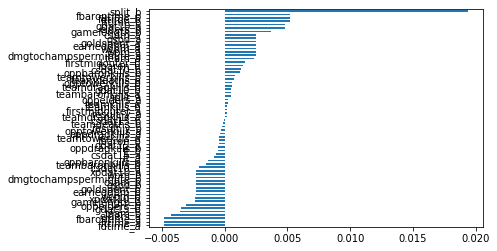

In [0]:
# Make this larger / spread
%matplotlib inline
coefficients = pd.Series(model_logregcv.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

## RandomForestClassifier

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42, n_jobs=-1, n_estimators=500,
                           max_depth=30, max_features=0.96,
                           min_samples_leaf=8,
                           min_samples_split=2
                           )
)

pipeline.fit(X_train, y_train)
# max_depth: 30, max_features: 0.96, min_samples leaf: 8, split: 2, n_est: 120,
# strategy: mean

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['team_a', 'split_a', 'gamelength_a',
                                      'result_y_a', 'teamkills_a',
                                      'teamdeaths_a', 'fdtime_a',
                                      'teamdragkills_a', 'oppdragkills_a',
                                      'elders_a', 'oppelders_a', 'ft_a',
                                      'fttime_a', 'firstmidouter_a',
                                      'teamtowerkills_a', 'opptowerkills_a',
                                      'fbaron_a', 'fbarontime_a',
                                      'teambaronkills_a', 'oppbaronkills_a',...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=30, max_features=0.96,
                                        max_leaf_nodes=None, max_samples=N

### Validation Accuracy

In [0]:
# Almost 7% better than guessing. Not bad.
y_pred = pipeline.predict(X_val)
print('Validation accuracy: ', pipeline.score(X_val, y_val))
# 58.36% first iteration
# 83.7% 2nd iteration..
# 58.67% 3rd iteration (no changes?)

Validation accuracy:  0.5867082035306335


### Randomized Search CV

In [0]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# param_distributions = {
#     'randomforestclassifier__n_estimators': range(100,1000),
#     'randomforestclassifier__max_depth': [15, 20, 25, 30, None],
#     'randomforestclassifier__max_features': uniform(0.2, 0.8),
#     'randomforestclassifier__min_samples_leaf': range(1, 10),
#     'randomforestclassifier__min_samples_split': range(2, 5),
#     'simpleimputer__strategy': ['mean', 'median']
# }

# search = RandomizedSearchCV(
#     pipeline,
#     param_distributions = param_distributions,
#     n_iter = 30,
#     cv=3,
#     scoring = 'accuracy',
#     verbose=10,
#     return_train_score=True,
#     n_jobs=-1,
#     random_state=42
# )

# search.fit(X_train, y_train)
# print('Validation accuracy', search.best_score_) 

# # 0.5667 w/ 1st model,
# # n_est range(50, 500) / max_depth [5 - 20, None] / max_features uniform(.2,.8)
# # 59.22% w/ 2nd model,
# # max_depth: 30, max_features: 0.96, min_samples leaf: 8, split: 2, n_est: 120,
# # strategy: mean

In [0]:
# print('Best hyperparameters', search.best_params_)
# print('Cross-validation MAE', search.best_score_)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           A       0.60      0.55      0.58       491
           B       0.57      0.62      0.60       472

    accuracy                           0.59       963
   macro avg       0.59      0.59      0.59       963
weighted avg       0.59      0.59      0.59       963



## Checking feature importances

In [0]:
# print('X_train shape before encoding', X_train.shape)

# encoder = pipeline.named_steps['ordinalencoder']
# encoded = encoder.transform(X_train)

# print('X_train shape after encoding', encoded.shape)

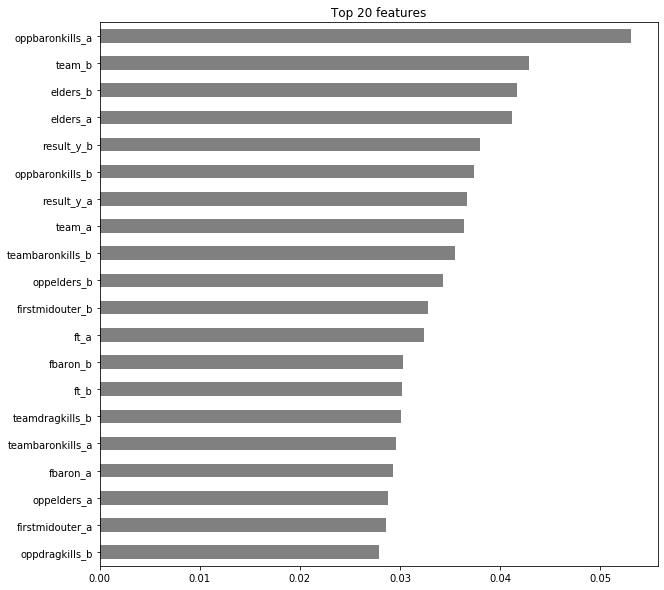

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
# importances = pd.Series(rf.feature_importances_, encoded.columns)

importances = pd.Series(rf.feature_importances_, X_train.columns)

# # Plot top n feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');


## XGBoost

In [0]:
from xgboost import XGBClassifier

XGBCpipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=500, random_state=42, n_jobs=-1)
)

XGBCpipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['team_a', 'split_a', 'gamelength_a',
                                      'result_y_a', 'teamkills_a',
                                      'teamdeaths_a', 'fdtime_a',
                                      'teamdragkills_a', 'oppdragkills_a',
                                      'elders_a', 'oppelders_a', 'ft_a',
                                      'fttime_a', 'firstmidouter_a',
                                      'teamtowerkills_a', 'opptowerkills_a',
                                      'fbaron_a', 'fbarontime_a',
                                      'teambaronkills_a', 'oppbaronkills_a',...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                 

In [0]:
from sklearn.metrics import accuracy_score
y_pred = XGBCpipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
# .57, n_est = 500
# 59.4% with simple model.

Validation Accuracy 0.5939771547248183


In [231]:
y_pred = XGBCpipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.6079734219269103


### Randomized Search CV on XGBoost

In [0]:
param_distributions = {
    'xgbclassifier__n_estimators': range(400, 700),
    'xgbclassifier__max_depth': [20, 25, 30, 35, 40, None],
    'xgbclassifier__max_features': uniform(0.8, 1.0),
    'xgbclassifier__min_samples_leaf': randint(1, 10), 
    'xgbclassifier__min_samples_leaf': randint(1, 5)
}

search = RandomizedSearchCV(
    XGBCpipeline,
    param_distributions = param_distributions,
    n_iter = 30,
    cv=3,
    scoring = 'accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
print('Validation accuracy', search.best_score_) 

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 25.9min finished


Validation accuracy 0.589563862928349


In [233]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', search.best_score_)

Best hyperparameters {'xgbclassifier__max_depth': 35, 'xgbclassifier__max_features': 1.773755518841459, 'xgbclassifier__min_samples_leaf': 3, 'xgbclassifier__n_estimators': 589}
Cross-validation accuracy 0.589563862928349


In [238]:
y_pred_cv = search.predict(X_test)
accuracy_score(y_test, y_pred_cv)

0.5921926910299004

# Visualizations

## Permutation importances

In [0]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

In [0]:
# Fit model outside of pipeline for permutation importances % Shapley
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model_transformers = XGBClassifier(n_estimators=500, random_state=42, n_jobs=-1)
model_transformers.fit(X_train_transformed, y_train)

In [0]:
permuter = PermutationImportance(
    model_transformers,
    scoring='accuracy',
    n_iter=10,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [0]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0131 ± 0.0109,result_y_a
0.0126 ± 0.0099,oppelders_b
0.0102 ± 0.0107,teambaronkills_a
0.0090 ± 0.0075,oppbaronkills_a
0.0089 ± 0.0154,result_y_b
0.0063 ± 0.0106,oppdragkills_a
0.0060 ± 0.0073,split_b
0.0053 ± 0.0081,teamdragkills_a
0.0051 ± 0.0050,fbaron_b
0.0048 ± 0.0088,fbaron_a


## Shapley Plots

In [0]:
# Use Ordinal Encoder, outside of a pipeline
features = new_df2_final.columns.drop('winner')
X = new_df2_final[features]
y = new_df2_final[target]

X_encoded = encoder.fit_transform(X)

model = XGBClassifier(n_estimators=500, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=600, n_jobs=-1, random_state=42)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

In [0]:
!pip install shap

Best hyperparameters {'max_depth': None, 'max_features': 0.6011150117432088, 'n_estimators': 201}
Cross-validation MAE 375.95637690332126


In [223]:
import shap

row = FPX_G2_Final

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit'
)

In [229]:
XGBCpipeline.predict_proba(FPX_G2_Final)

array([[0.17086846, 0.82913154]], dtype=float32)

In [0]:
FPX = new_df2_final[new_df2_final['team_b'] == 'Funplus Phoenix']
FPX_G2 = FPX[FPX['team_a'] == 'G2 Esports']
FPX_G2 = FPX_G2.reset_index(drop=True)
FPX_G2_Final = FPX_G2.iloc[[0]]

In [0]:
FPX_G2_Final = FPX_G2_Final.drop(columns=target)

## PDP plots

In [0]:
!pip install pdpbox
!pip install shap
from pdpbox.pdp import pdp_isolate, pdp_plot

In [0]:
feature = 'result_y_b'

isolated = pdp_isolate(
    model=XGBCpipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature,
    # num_grid_points=50
)

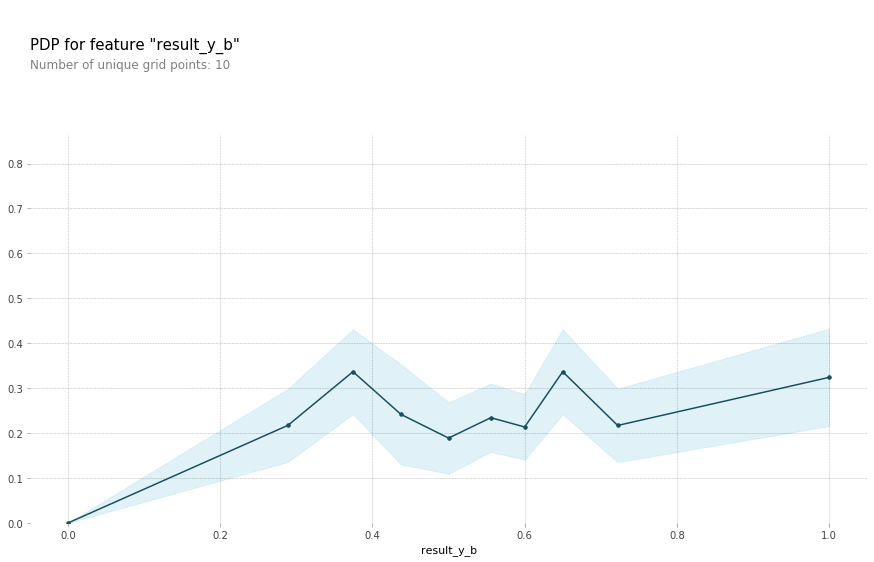

In [184]:
pdp_plot(isolated, feature_name=feature, #plot_lines=True,
         frac_to_plot=0.05);

### PDP 2 features

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

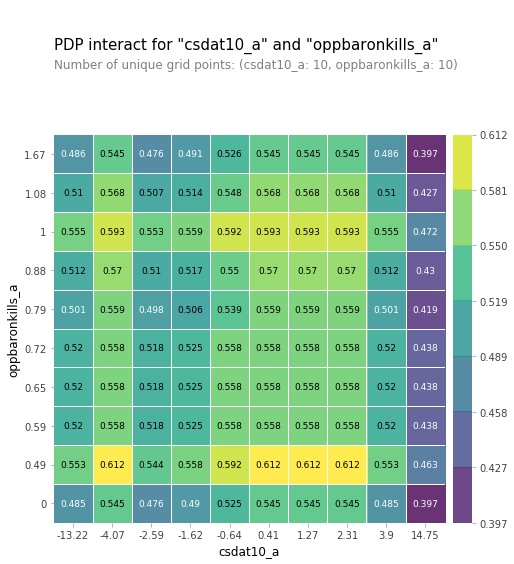

In [0]:
features = ['csdat10_a', 'oppbaronkills_a']

interaction = pdp_interact(
    model=XGBCpipeline,
    dataset=X_val,
    model_features = X_val.columns,
    features = features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [0]:
# target = 'winner'

# # features = new_df.columns

# X_train = train.drop(columns=target)
# y_train = train[target]
# X_val = val.drop(columns=target)
# y_val = val[target]
# X_test = test.drop(columns=target)
# y_test = test[target]

# ROC, AUC scores

In [0]:
# Get predicted probabilities for the last class
y_pred_proba = XGBCpipeline.predict_proba(X_val)[:,-1]

# Get validation ROC AUC score
print(roc_auc_score(y_val, y_pred_proba))
# 1st pipeline: 61%
# XGBC pipeline: 61.2%

0.636156322275536


In [178]:
# X_test_processed = processor.transform(X_test)

class_index = 1
y_pred_proba = XGBCpipeline.predict_proba(X_test)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.6460958296362023


# Accuracy, precision, recall

In [0]:
# Accuracy
correct_predictions = 
total_predictions =

SyntaxError: ignored

In [0]:
# Precision
true_positive_predictions = 
total_positive_predictions = 

In [0]:
# Recall
true_positive_predictions = 
actual_positives = 

# Test_Josh section

In [0]:
df6['team'].value_counts()

In [0]:
df6[df6['team'] == 'Hong Kong Attitude'].loc[9433]

In [0]:
# josh = pd.DataFrame(pd.concat([df6.iloc[0], df6.iloc[1]])).T
best_team = df6[df6['team'] == 'Funplus Phoenix'].loc[10684]
worst_team = df6[df6['team'] == 'Hong Kong Attitude'].loc[9433]

In [0]:
test_josh = pd.DataFrame(pd.concat([best_team, worst_team])).T

test_josh.columns = ['gameid_a', 'team_a', 'result_a', 'patchno_a', 'gamelength_a', 'result_y_a',
       'teamkills_a', 'teamdeaths_a', 'fdtime_a', 'teamdragkills_a', 'oppdragkills_a',
       'elders_a', 'oppelders_a', 'ft_a', 'fttime_a', 'firstmidouter_a',
       'teamtowerkills_a', 'opptowerkills_a', 'fbaron_a', 'fbarontime_a',
       'teambaronkills_a', 'oppbaronkills_a', 'dmgtochampsperminute_a', 'wpm_a',
       'wcpm_a', 'earnedgpm_a', 'goldspent_a', 'gspd_a', 'cspm_a', 'gdat10_a', 'gdat15_a',
       'xpdat10_a', 'csdat10_a', 'csdat15_a', 'gameid_b', 'team_b', 'result_b',
       'patchno_b', 'gamelength_b', 'result_y_b', 'teamkills_b', 'teamdeaths_b',
       'fdtime_b', 'teamdragkills_b', 'oppdragkills_b', 'elders_b', 'oppelders_b', 'ft_b',
       'fttime_b', 'firstmidouter_b', 'teamtowerkills_b', 'opptowerkills_b', 'fbaron_b',
       'fbarontime_b', 'teambaronkills_b', 'oppbaronkills_b', 'dmgtochampsperminute_b',
       'wpm_b', 'wcpm_b', 'earnedgpm_b', 'goldspent_b', 'gspd_b', 'cspm_b', 'gdat10_b',
       'gdat15_b', 'xpdat10_b', 'csdat10_b', 'csdat15_b']

test_josh = test_josh.drop(columns=['result_a','result_b', 'gameid_a', 'gameid_b',
                                    'patchno_a', 'patchno_b'])
# df6[df6['team'] == 'Splyce'].loc[8185]

In [0]:
test_josh

In [0]:
pipeline.predict_proba(test_josh)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
# importances = pd.Series(rf.feature_importances_, encoded.columns)

importances = pd.Series(rf.feature_importances_, X_train.columns)

# # Plot top n feature importances
n = 40
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

In [0]:
df4 = df4.copy()
df4 = df4.drop(columns='patchno')

In [0]:
df5 = df4.groupby(['gameid'])['team', 'result_x', 'patchno', 'gamelength', 'result_y',
       'teamkills', 'teamdeaths', 'fdtime', 'teamdragkills', 'oppdragkills',
       'elders', 'oppelders', 'ft', 'fttime', 'firstmidouter',
       'teamtowerkills', 'opptowerkills', 'fbaron', 'fbarontime',
       'teambaronkills', 'oppbaronkills', 'dmgtochampsperminute', 'wpm',
       'wcpm', 'earnedgpm', 'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15',
       'xpdat10', 'csdat10', 'csdat15'].mean()
       
df5 = df5.reset_index()
df5.columns = [ 'gameid', 'result_x', 'patchno', 'gamelength', 'result_y',
       'teamkills', 'teamdeaths', 'fdtime', 'teamdragkills', 'oppdragkills',
       'elders', 'oppelders', 'ft', 'fttime', 'firstmidouter',
       'teamtowerkills', 'opptowerkills', 'fbaron', 'fbarontime',
       'teambaronkills', 'oppbaronkills', 'dmgtochampsperminute', 'wpm',
       'wcpm', 'earnedgpm', 'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15',
       'xpdat10', 'csdat10', 'csdat15']
print(df5.shape)
df5.head()

In [0]:
df4.columns

In [0]:
df4.head()

## Merging 2 rows at a time. (Getting each game from 2 rows -> 1 row)

In [0]:
# Empty dict
dict1 = {}

for team in y.team.unique:
  dict2 = {}
  team_df = y[y.team == team]
  avg_kills = team_df['teamkills'].mean()
  dict2['avg_kills'] = avg_kills
  average_team_deaths ...

  dict1[team] = dict2

# End of for loop (inside)

# make df of dict 1

####
# Merge x + y on 'team'

# To flatten:
## use 'gameid' ... 

# .. teamA, team B, 1/0 -> A/B win. (0 and 1 represent A and B)
# A/B should be fine with models
# .. iterate 2 rows at a time 

## Grouping by 'gameid', 'team', and 'split

In [0]:
# Here we have average values per team, per game.
# NOTE: We lose all non-numeric columns, some of which are intesesting:
# Note: added 'split' to groupby.
final_df_1 = df.groupby(['gameid','team', 'split'])['league', 'game', 'patchno', 'side',
       'gamelength', 'result', 'teamkills', 'teamdeaths', 'fbtime', 'ckpm',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15'].mean()
       
final_df_1 = final_df_1.reset_index()
final_df_1.columns = ['gameid','team','split','patchno',
       'gamelength', 'result', 'teamkills', 'teamdeaths',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']

In [0]:
worlds_2019.head(10)

In [0]:
print("final_df_1 shape: ", final_df_1.shape) # 6 columns lost: league, game, side,
# fbtime, ckpm, firsttothreetowers
print('df shape: ', df.shape)
final_df_1.head()

## Removing 'gameid' -> possible final baseline dataframe

In [0]:
# Now it's getting interesting.

final_df1 = final_df_1.drop('gameid', axis=1)

final_df1 = final_df1.groupby(['team', 'split']).mean()
final_df1 = final_df1.reset_index()
final_df1.columns = ['team','split','patchno',
       'gamelength', 'result', 'teamkills', 'teamdeaths',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']
print(final_df1.shape)
final_df1.head() # Consider removing gameid / groupby gameid also
# Here we see each team's averages per split.

In [0]:
final_df1.head(20)

## Grouping by 'team' and 'patchno -> possible final baseline dataframe

In [0]:
# This could also be our final baseline groupby (minus results column)
y.groupby(['team', 'patchno']).mean()

In [0]:
# Making the 'team' + 'patchno' into a dataframe
final_df2 = final_df_1.drop('gameid', axis=1)

final_df2 = final_df2.groupby(['team', 'patchno']).mean()
final_df2 = final_df2.reset_index()
final_df2.columns = ['team','patchno',
       'gamelength', 'result', 'teamkills', 'teamdeaths',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']
print(final_df2.shape)
final_df2.head()

# Fast first model (final_df2)

## Creating train/val/test sets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(final_df2, test_size = .20, random_state = 42) # stratify?
train.shape, test.shape

In [0]:
train, val = train_test_split(train, test_size = .20, random_state = 42)
train.shape, val.shape

## Random Forest Regressor

In [0]:
# target = 'result'

# # features = 

# X_train = train.drop(columns = target)
# y_train = train[target]
# X_val = val.drop(columns = target)
# y_val = val[target]
# X_test = test.drop(columns = target)
# y_test = test[target]

# X_train.shape, X_val.shape

In [0]:
val.head()

In [0]:
# checking baseline
val['result'].mean()

In [0]:
# Linear reg


### Making pipeline

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=42, n_jobs = -1)
)
pipeline.fit(X_train, y_train)

### Getting validation accuracy

In [0]:
y_pred = pipeline.predict(X_val)
print('Validation Accuracy: ', y_pred.mean())

### Checking feature importances

In [0]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

# We see here that tower kills are skewing the data.
# After I removed them, kills would skew the data.
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

# Trimming final_df2

In [0]:
final_df3 = 

## Running a Random Forest Classifier model on y dataframe

In [0]:
ytrain, ytest = train_test_split(y, test_size = .20, random_state = 42) # stratify?
ytrain.shape, ytest.shape

In [0]:
ytrain, yval = train_test_split(ytrain, test_size = .20, random_state = 42)
ytrain.shape, yval.shape

In [0]:
Xy_train = ytrain.drop(columns = target)
yy_train = ytrain[target]
Xy_val = yval.drop(columns = target)
yy_val = yval[target]
Xy_test = ytest.drop(columns = target)
yy_test = ytest[target]

Xy_train.shape, Xy_val.shape

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_jobs = -1)
)
pipeline.fit(Xy_train, yy_train)

In [0]:
yy_pred = pipeline.predict(Xy_val)
print('y DF set Validation accuracy: ',
      pipeline.score(Xy_val, yy_val)) # Leakage